In [133]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [134]:
data = pd.read_csv('games.csv')

In [135]:
data.shape

(81312, 20)

In [136]:
data.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [137]:
data.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


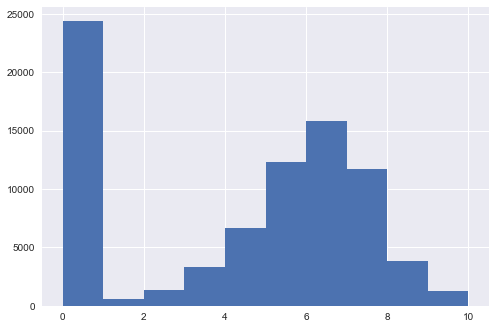

In [138]:
plt.hist(data['average_rating'])
plt.show()

In [139]:
data[data['average_rating'] == 0].iloc[0]

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

In [140]:
data[data['average_rating'] > 0].iloc[0]

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object

In [141]:
data = data[data['users_rated'] != 0]

In [142]:
data.shape

(56932, 20)

In [143]:
data.dropna(axis = 0, inplace=True)

In [144]:
data.shape

(56894, 20)

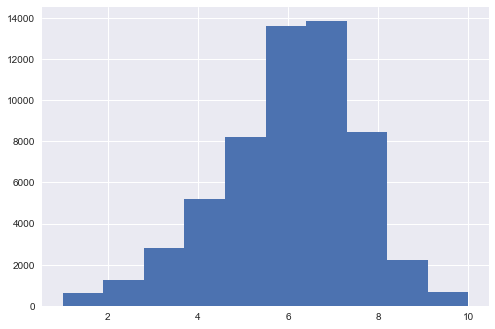

In [145]:
plt.hist(data['average_rating'])
plt.show()

In [146]:
corr_mat = data.corr()

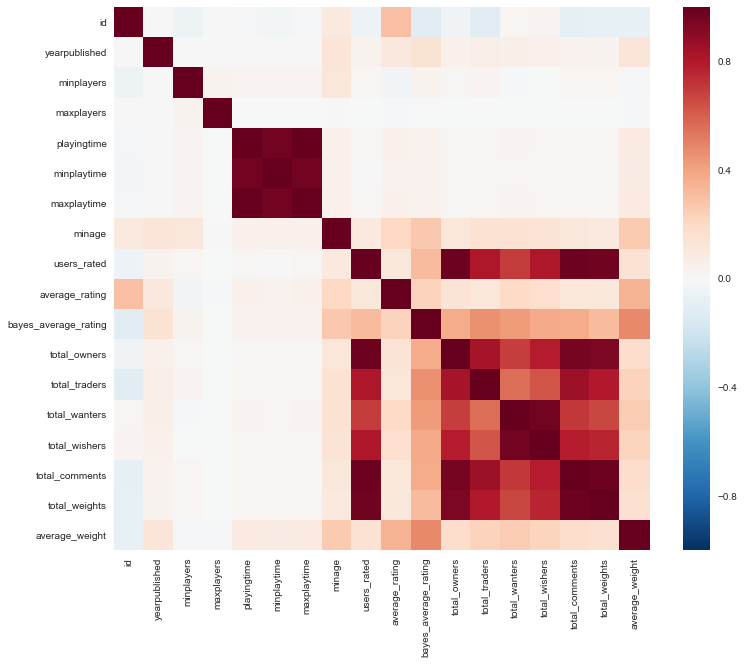

In [147]:
fig = plt.figure(figsize=(12,10))
seaborn.heatmap(corr_mat)
plt.xticks()
plt.show()

In [148]:
features = data.columns.tolist()
features

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [149]:
no_use = ['bayes_average_rating','average_rating','type','name','id']
  
for ele in no_use:
    features.remove(ele)
features

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [150]:
target = 'average_rating'

In [151]:
train_x,test_x,train_y,test_y = train_test_split(data[features],data[target],test_size = 0.2)

In [152]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(45515, 15)
(45515,)
(11379, 15)
(11379,)


In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [154]:
LR = LinearRegression()
LR.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
y_pred = LR.predict(test_x)

In [156]:
mean_squared_error(test_y,y_pred)

2.1149951800374902

In [157]:
RFR = RandomForestRegressor(n_estimators=100,
                            min_samples_leaf = 10)
RFR.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [158]:
y_pred = RFR.predict(test_x)

In [159]:
mean_squared_error(test_y,y_pred)

1.4922015342116499

In [160]:
single_test_case = test_x.iloc[112]
origial_rating = test_y.iloc[100]
single_test_case

yearpublished     2009.0
minplayers           1.0
maxplayers           0.0
playingtime         15.0
minplaytime         15.0
maxplaytime         15.0
minage               0.0
users_rated          6.0
total_owners        11.0
total_traders        0.0
total_wanters        0.0
total_wishers        3.0
total_comments       2.0
total_weights        1.0
average_weight       2.0
Name: 50116, dtype: float64

In [161]:
rating_LR = LR.predict(single_test_case.values.reshape(1,-1))
rating_RFR = RFR.predict(single_test_case.values.reshape(1,-1))

In [162]:
print('Original: {}'.format(origial_rating))
print('LR: {}'.format(rating_LR[0]))
print('RFR: {}'.format(rating_RFR[0]))

Original: 5.5
LR: 6.033758063951298
RFR: 6.138873595985853
